# Part I - Ford GoBike System Data
## by Kenechukwu Nwankwo




## Investigation Overview


> The overall goals of the presentation here is to present key insight discovered from the Ford Go biking system data set. 


## Dataset Overview

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. There are 183412 rows and 16 columns in the dataset. Before performing analysis on the dataset, I wrangled the data and deleted rows with null values, changed the data types for some columns and added new columns to the dataframe.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# read in the data
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

# make a copy of the data
df = bike_df.copy()

# display the first five rows of the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Gender Distribution

> Male users made up a higehr percentage than female and other genders


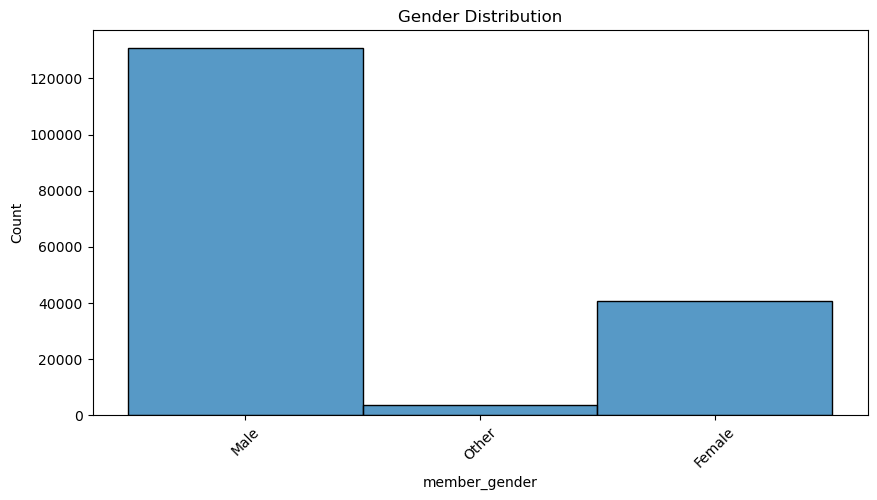

In [3]:
# Function for univariate plots
def univariate_plot(variable, plot_title, plot_type = sns.histplot):
    """Function for univariate plots
    Args: 
        variable: a column to be plotted
        plot_title: title of the plot
        plot_type: the type of plot e.g hisplot, countplot, etc
    """
    plt.figure(figsize=(10, 5))
    plot_type(data=df, x=variable)
    plt.xticks(rotation = 45)
    plt.title(plot_title); 
    
univariate_plot('member_gender', 'Gender Distribution')

## Duration against User type

> Customers ride for a longer time than subscribers

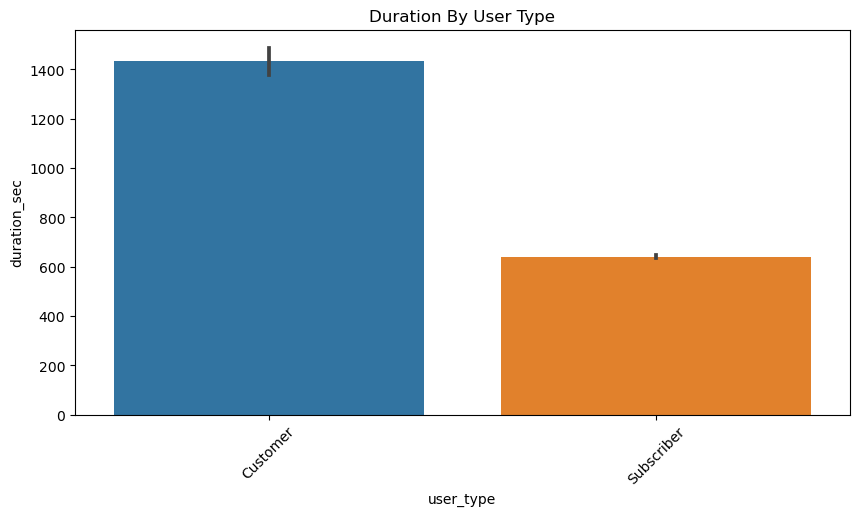

In [4]:
# Function for bivariate plots
def bivariate_plot(variable_x, plot_title, variable_y='duration_sec', plot_type = sns.barplot):
    """Function for univariate plots
    Args: 
        variable_x: a column to be plotted on the x_axis
        plot_title: title of the plot
        variable_y: a column to be plotted on the y_axis
        plot_type: the type of plot e.g catplot
    """
    plt.figure(figsize=(10, 5))
    plot_type(data=df, x=variable_x, y=variable_y) 
    plt.xticks(rotation = 45)
    plt.title(plot_title); 
    
bivariate_plot('user_type', 'Duration By User Type')

## Duration by Bike sharing conditioned by Age

> Most of the Long trips were not shared trips and were mostly done by younger drivers. 

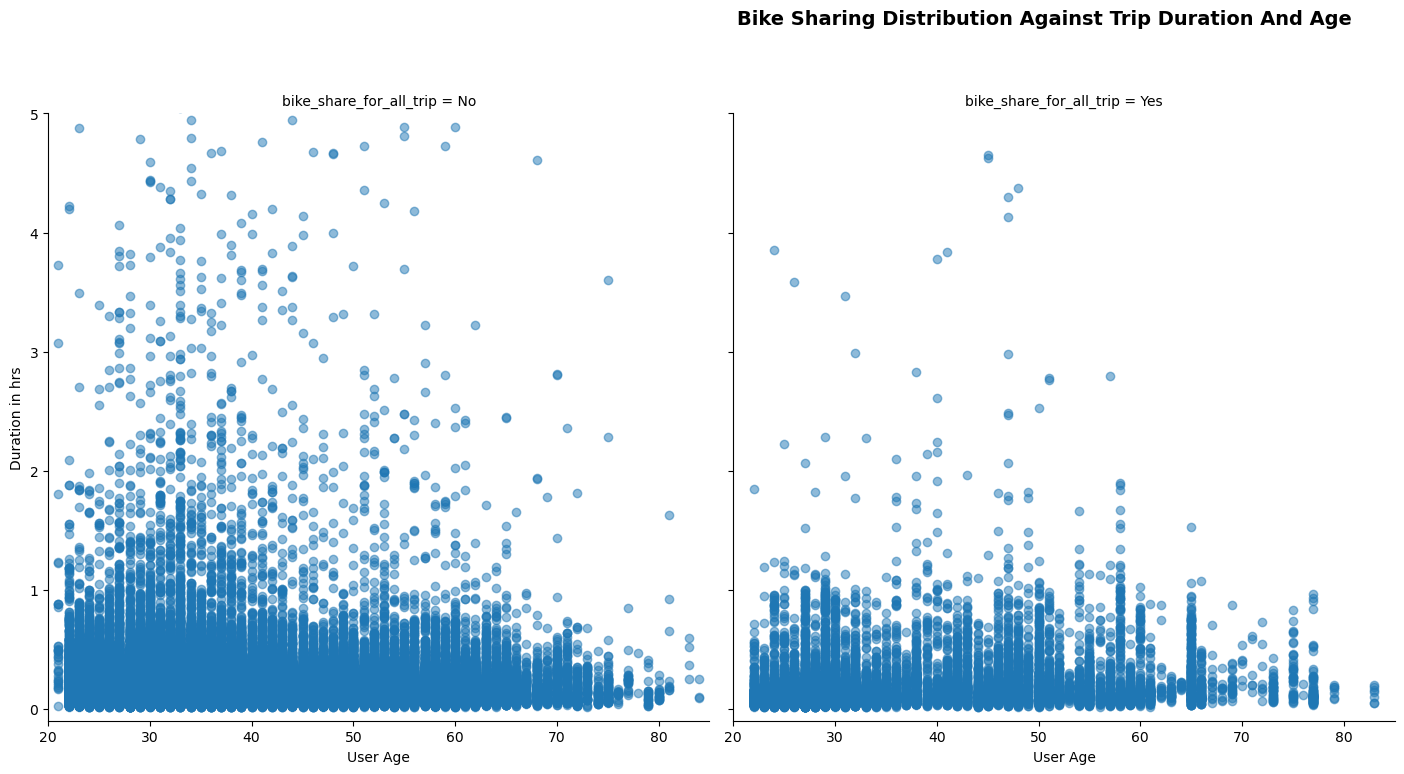

In [5]:
# Creating a scatter plot to examine the distribution for Bike sharing against trip duration in hrs and age 

df['duration_hr']= (df['duration_sec']/3600)
df['member_age']= (2022 - df['member_birth_year'])
Dist_type = sns.FacetGrid(data = df, col = 'bike_share_for_all_trip', col_wrap = 3, height = 7,xlim = [20, 85], ylim = [-0.1, 5])
Dist_type.map(plt.scatter,'member_age', 'duration_hr', alpha=0.5)
Dist_type.set_xlabels('User Age')
Dist_type.set_ylabels('Duration in hrs');
plt.suptitle("Bike Sharing Distribution against Trip Duration and age".title(),y=1.1,fontsize=14,weight="bold");

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_kene.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 